# Proyecto Diabetes
## Aplicación de ML en el Conjunto de Datos Diabetes
### Estudiantes: Dereck, Fabian
#### Fecha entrega: 20 Octubre 2024

In [1]:
from IPython.display import IFrame

# Insertar un PDF usando un IFrame
file_path = "Proyecto.pdf"
IFrame(file_path, width=900, height=700)

In [3]:
pip install imblearn


In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [4]:
# Cargar el dataset
doc = "/content/drive/MyDrive/Python/MLDiabetes/diabetes.csv"
df = pd.read_csv(doc)

FileNotFoundError: [Errno 2] No such file or directory: '/diabetes.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Mostrar las primeras filas del dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [15]:
# Descripción estadística básica
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [17]:
# Evaluar las columnas
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [18]:
# Listado de columnas que no deberían tener ceros
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Reemplazar valores 0 con NaN en las columnas relevantes
for column in columns_with_zeros:
    df[column] = df[column].mask(df[column] == 0)


In [19]:
# Verificar valores faltantes después de reemplazar ceros
missing_values_after_replacement = df.isnull().sum()
print("Valores faltantes después del reemplazo de ceros:")
print(missing_values_after_replacement)

Valores faltantes después del reemplazo de ceros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


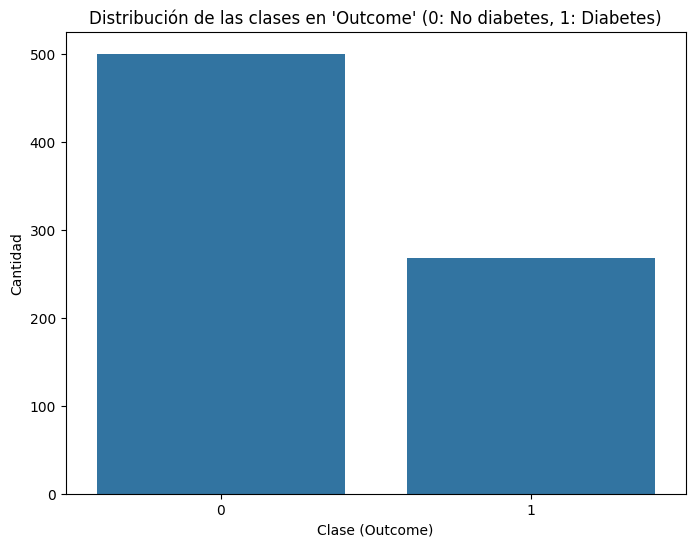

In [20]:
# Visualizar la distribución de las clases en la columna 'Outcome'
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=df)
plt.title("Distribución de las clases en 'Outcome' (0: No diabetes, 1: Diabetes)")
plt.xlabel("Clase (Outcome)")
plt.ylabel("Cantidad")
plt.show()

In [21]:
# Gráfico de pares para visualizar la relación entre características y Outcomes
sns.pairplot(df, hue="Outcome")
plt.show()

Output hidden; open in https://colab.research.google.com to view.

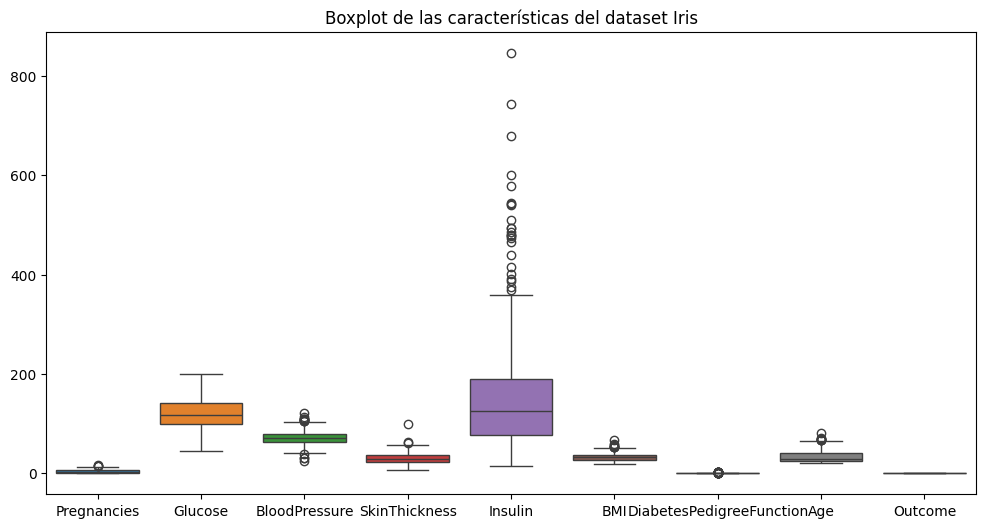

In [22]:
# Boxplot para analizar la variabilidad
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot de las características del dataset Iris")
plt.show()

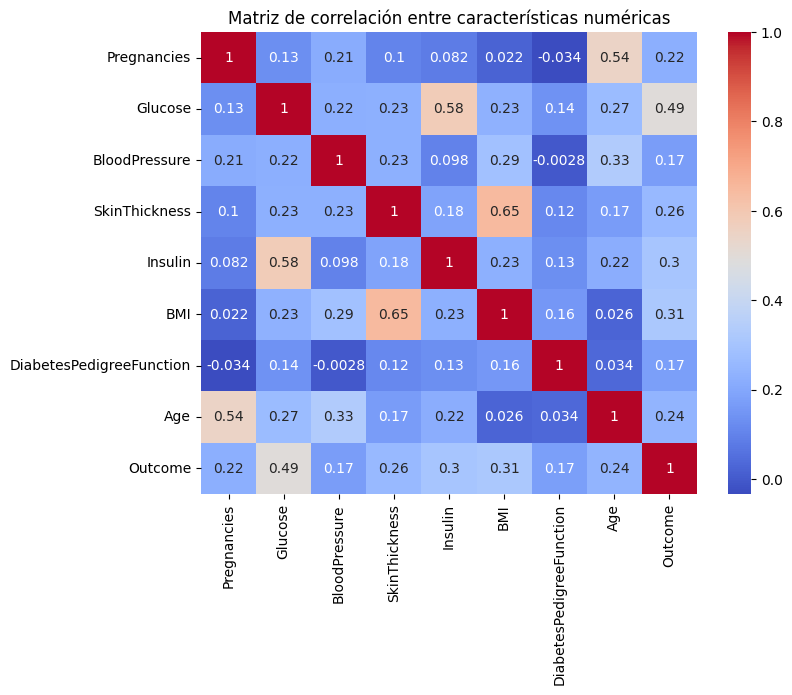

In [23]:
# Crear el mapa de calor para la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre características numéricas")
plt.show()

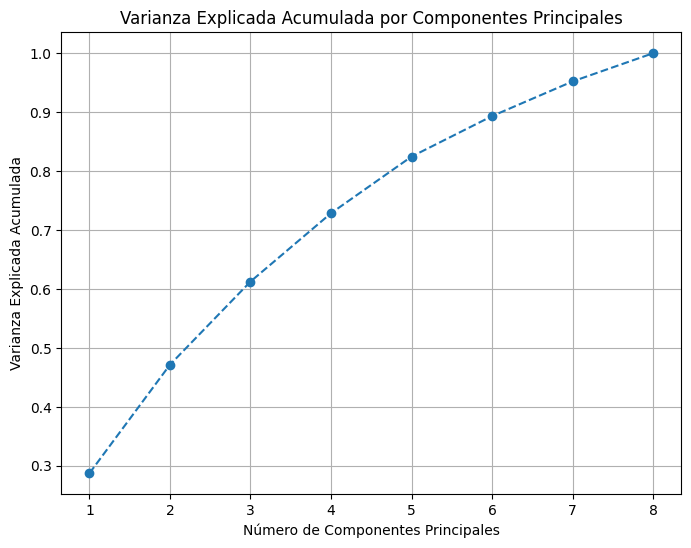

In [24]:
# Preprocesamiento: escalamiento de las características
features = df.drop(columns='Outcome')
features = features.fillna(features.mean())  # Imputación de valores faltantes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar PCA sin reducir el número de componentes (se obtienen todas las componentes)
pca = PCA()
pca.fit(scaled_features)

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.show()


La gráfica parece mostrar una "curva de codo" alrededor de 3 o 4 componentes. Esto sugiere que, después de 3 o 4 componentes, agregar más componentes no aporta una cantidad significativa de varianza explicada adicional.

En este caso, se seleccionaran 4 componentes como el número óptimo para capturar la mayoría de la información sin incluir demasiadas dimensiones adicionales innecesarias.


In [25]:
# Preprocesamiento: escalamiento de las características
features = df.drop(columns='Outcome')
features = features.fillna(features.mean())  # Imputación de valores faltantes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [26]:
# Aplicar PCA con 4 componentes principales
pca_4 = PCA(n_components=4)
pca_4_components = pca_4.fit_transform(scaled_features)

In [27]:
# Varianza explicada por las 4 componentes principales
explained_variance_ratio_4 = pca_4.explained_variance_ratio_

In [28]:
# Mostrar la varianza explicada por cada componente y la suma total
print("Varianza explicada por cada componente:")
print(explained_variance_ratio_4)
print("Suma de varianza explicada por las 4 componentes:", np.sum(explained_variance_ratio_4))

Varianza explicada por cada componente:
[0.28750131 0.18411087 0.14102225 0.11594187]
Suma de varianza explicada por las 4 componentes: 0.7285762993291924


Text(0.5, 1.0, 'Varianza Explicada por Cada Componente Principal')

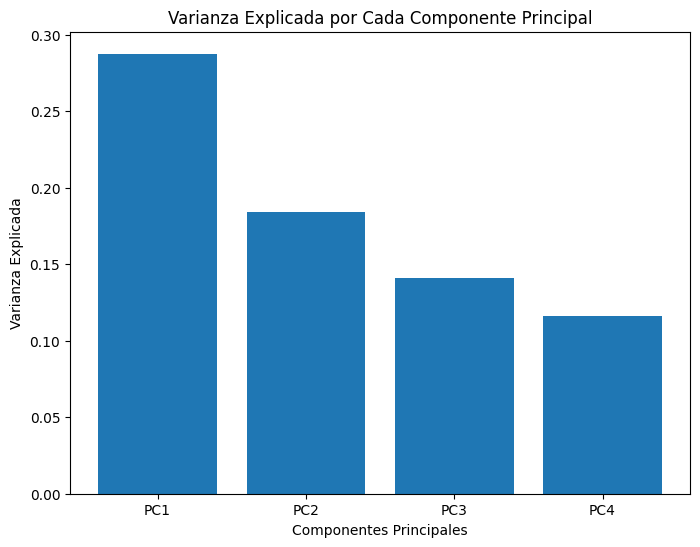

In [29]:
# Gráfico de barras para mostrar la varianza explicada por cada componente
plt.figure(figsize=(8, 6))
plt.bar(range(1, 5), explained_variance_ratio_4, tick_label=["PC1", "PC2", "PC3", "PC4"])
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Cada Componente Principal')

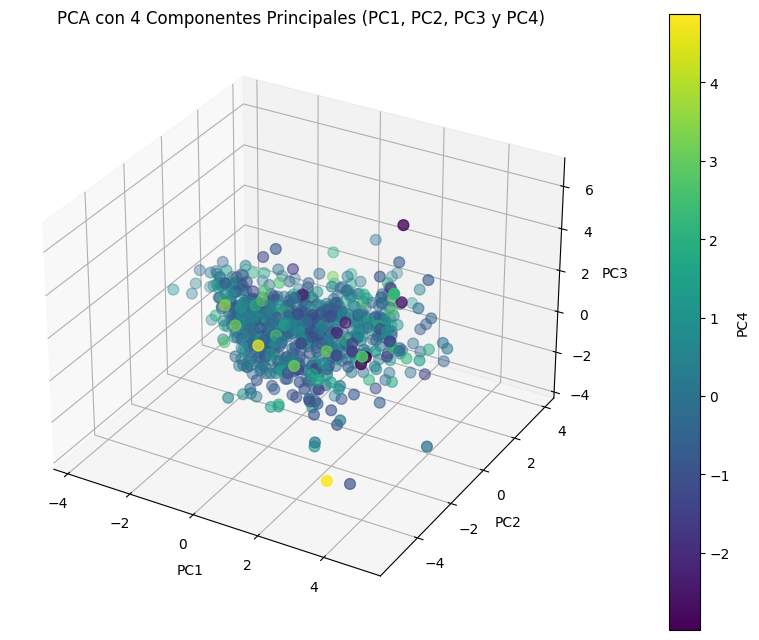

In [30]:
# Crear una figura en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar las primeras tres componentes principales
scatter = ax.scatter(pca_4_components[:, 0], pca_4_components[:, 1], pca_4_components[:, 2],
                     c=pca_4_components[:, 3], cmap='viridis', s=60)

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Agregar una barra de colores para la cuarta componente
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('PC4')

plt.title('PCA con 4 Componentes Principales (PC1, PC2, PC3 y PC4)')
plt.show()


In [31]:
# Preprocesamiento: escalamiento de las características
features = df.drop(columns='Outcome')
features = features.fillna(features.mean())  # Imputación de valores faltantes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [32]:
# Aplicar PCA con 4 componentes principales
pca_4 = PCA(n_components=4)
pca_4.fit(scaled_features)
pca_features = pca.fit_transform(scaled_features)

In [33]:
# Obtener la matriz de cargas
loadings = pd.DataFrame(pca_4.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=features.columns)

In [34]:
# Mostrar las cargas de cada característica en los 4 componentes principales
print(loadings)

                               PC1       PC2       PC3       PC4
Pregnancies               0.308371  0.552069 -0.092072  0.171568
Glucose                   0.421065 -0.068170  0.455478 -0.188507
BloodPressure             0.378498  0.139202 -0.317728 -0.110409
SkinThickness             0.390485 -0.347245 -0.367818 -0.024245
Insulin                   0.320583 -0.152909  0.593092 -0.327633
BMI                       0.390827 -0.437935 -0.349692 -0.023567
DiabetesPedigreeFunction  0.146564 -0.271494  0.270987  0.888682
Age                       0.393539  0.511603  0.018577  0.156832


In [35]:
# Preprocesamiento: escalamiento de las características
features = df.drop(columns='Outcome')
labels = df['Outcome']  # Esta es la variable objetivo
features = features.fillna(features.mean())  # Imputar valores faltantes con la media

In [36]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=42)

In [37]:
# Entrenar un modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [39]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [40]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [41]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar un modelo de Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [43]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [44]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7272727272727273
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [45]:
# Entrenar un modelo de Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

In [47]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [48]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [49]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [50]:
report = classification_report(y_test, y_pred)

In [51]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [52]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.7532467532467533
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [53]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pca_features, labels, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

# Entrenar el modelo de Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Entrenar el modelo SVM
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [55]:
!pip install keras tensorflow


In [87]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import os

# Aplicar SMOTE para balancear las clases
y_train.value_counts()  # Verificar el balance de clases antes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
y_train_res.value_counts()  # Verificar el balance de clases después

# Imputar valores faltantes usando KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_res = imputer.fit_transform(X_train_res)
X_test = imputer.transform(X_test)

# Escalar los datos
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Dividir los datos para entrenamiento y validación
X_train_res, X_val, y_train_res, y_val = train_test_split(X_train_res, y_train_res, test_size=0.2, random_state=42)

# Crear el modelo de Redes Neuronales usando TensorFlow y Keras
model = Sequential()
model.add(Dense(248, input_shape=(X_train_res.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train_res, y_train_res, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_accuracy * 100}%')

# Guardar el modelo entrenado en Google Drive
model_save_path = "/content/drive/MyDrive/Python/MLDiabetes/diabetes_prediction_model.keras"
model.save(model_save_path)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6739 - loss: 0.6278 - val_accuracy: 0.7516 - val_loss: 0.5407
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7819 - loss: 0.4716 - val_accuracy: 0.7640 - val_loss: 0.5252
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7478 - loss: 0.4848 - val_accuracy: 0.7888 - val_loss: 0.5109
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7635 - loss: 0.4371 - val_accuracy: 0.7888 - val_loss: 0.5058
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7654 - loss: 0.4444 - val_accuracy: 0.7950 - val_loss: 0.5028
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8026 - loss: 0.4353 - val_accuracy: 0.8261 - val_loss: 0.4836
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.4244 - val_accuracy: 0.8137 - val_loss: 0.4943
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8260 - loss: 0.4065 - val_accuracy: 0.8012 - val_loss: 0.

In [88]:
# Función para cargar el modelo y hacer predicciones
def predict_diabetes(input_data):
    # Cargar el modelo guardado
    if not os.path.exists(model_save_path):
        raise FileNotFoundError("El archivo del modelo no se encontró. Asegúrate de haber entrenado y guardado el modelo.")
    loaded_model = load_model(model_save_path)

    # Preprocesar el input_data
    input_df = pd.DataFrame([input_data], columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    input_array = input_df.to_numpy()  # Convertir a numpy array
    scaled_input = scaler.transform(input_array)  # Escalar usando el mismo scaler
    scaled_input = imputer.transform(scaled_input)  # Imputar valores faltantes

    # Hacer la predicción
    mlp_pred = loaded_model.predict(scaled_input)
    return mlp_pred[0] >= 0.5

In [89]:
# Ejemplo de uso de la función
input_data_list = [
    [5, 130, 80, 0, 0, 35.1, 0.382, 40],  # Esperado: False (No tiene diabetes)
    [10, 168, 74, 0, 0, 38, 0.537, 34],  # Esperado: True (Tiene diabetes)
    [3, 100, 60, 25, 100, 30, 0.5, 28],  # Esperado: False (No tiene diabetes)
    [8, 190, 90, 35, 150, 45.3, 0.8, 50],  # Esperado: True (Tiene diabetes)
    [1, 85, 66, 29, 0, 26.6, 0.351, 31]  # Esperado: False (No tiene diabetes)
]

# Realizar predicciones y mostrar los resultados
for i, input_data in enumerate(input_data_list):
    prediction_result = predict_diabetes(input_data)
    expected_result = "Tiene diabetes" if prediction_result else "No tiene diabetes"
    print(f'Caso {i+1}: Predicción: {expected_result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Caso 1: Predicción: No tiene diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Caso 2: Predicción: No tiene diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
Caso 3: Predicción: Tiene diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Caso 4: Predicción: No tiene diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Caso 5: Predicción: No tiene diabetes
